In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from adjustText import adjust_text


In [3]:
df=pd.read_csv('document_list_with_subcategories_v2.csv',na_filter=False)

In [7]:
df['subcategories'].value_counts()

Subscription Cancellation         126
Reservation (General)              73
Bill Negotiation                   60
Reservation (Flight/Hotel/Car)     38
Inventory Inquiry                  30
Refund/Compensation                19
Mortgage/Loan Inquiry              15
Housing Support                    14
Medical Service                    13
Technical Support                  11
Complaints                         11
Account Information Update          8
Membership Benefits                 5
Insurance Inquiry                   4
Installation                        4
Name: subcategories, dtype: int64

In [162]:
res1=pd.read_csv('document_list_0.14.2_automatic.csv')
res2=pd.read_csv('document_list_0.14.2_automatic_title_in_contnent.csv')
res3=pd.read_csv('document_list_0.14.2_custom_title_in_contnent.csv')

In [163]:
df=pd.merge(df, res1,on='doc_ids',how='left')
df=pd.merge(df, res2,on='doc_ids',how='left')
df=pd.merge(df, res3,on='doc_ids',how='left')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_x', 'doc_names_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
df.to_csv('retrieve_sample_1.2.0.csv',index=False)

In [109]:
df['match_flag_y'].value_counts()/len(df)

1    0.981439
2    0.009281
0    0.009281
Name: match_flag_y, dtype: float64

In [106]:
np.mean(df[df['match_flag_y']==1][['score_1_y']]).iloc[0]-np.mean(df[df['match_flag_y']==1][['score_2_y']]).iloc[0]

0.24476632738488346

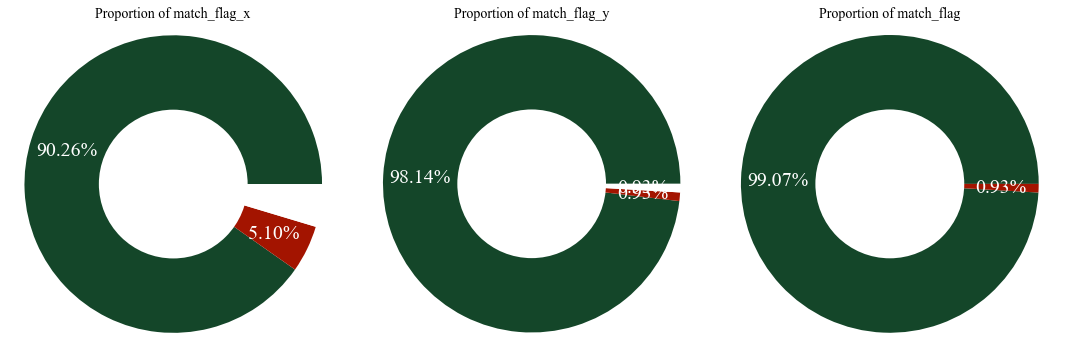

In [134]:

mpl.rcParams['font.family'] = 'Times New Roman'
cmap = cm.get_cmap('Blues_r')
columns = ['match_flag_x', 'match_flag_y', 'match_flag']
pie_radius = 0.1
circle_radius = 0.5 * pie_radius
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
label_fontsize = 20
percentage_fontsize = 20
title_fontsize = 14
for i, col in enumerate(columns):
    value_counts = df[col].value_counts(normalize=True)
    labels = value_counts.index
    sizes = value_counts.values

    colors = ['#144629','#a31400','white']
    axes[i].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=0, pctdistance=0.75, colors=colors, radius=pie_radius,
                textprops={'fontsize': label_fontsize, 'color': 'white'})
    axes[i].texts  # 获取所有文本对象
    for t in axes[i].texts[len(labels):]:  # 选取百分比文本
        t.set_fontsize(percentage_fontsize)

    centre_circle = plt.Circle((0,0), circle_radius, fc='white')
    axes[i].add_artist(centre_circle)
    axes[i].axis('equal')  # 保证圆形
    axes[i].set_title(f'Proportion of {col}', fontsize=title_fontsize)

plt.tight_layout()
plt.show()

In [ ]:

cmap = cm.get_cmap('Blues_r')
columns = ['match_flag_x', 'match_flag_y', 'match_flag']
pie_radius = 0.3
circle_radius = 0.5 * pie_radius
label_fontsize = 15
percentage_fontsize = 20
title_fontsize = 14

for i, col in enumerate(columns):
    fig, ax = plt.subplots(figsize=(1, 1))

    value_counts = df[col].value_counts(normalize=True)
    labels = value_counts.index
    sizes = value_counts.values

    colors = colors = ['#144629','#a31400','#f1f0e9']

    ax.pie(sizes,  startangle=0, pctdistance=1.15, colors=colors, radius=pie_radius,
           textprops={'fontsize': label_fontsize, 'color': 'black'})

    centre_circle = plt.Circle((0, 0), circle_radius, fc='white')
    ax.add_artist(centre_circle)
    ax.axis('equal')  # 保证圆形



In [164]:
print(df[df['match_flag_x']==1]['score_1_x'].mean())
print(df[df['match_flag_x']==1]['score_2_x'].mean())

print(df[df['match_flag_y']==1]['score_1_y'].mean())
print(df[df['match_flag_y']==1]['score_2_y'].mean())
print(df[df['match_flag']==1]['score_1'].mean())
print(df[df['match_flag']==1]['score_2'].mean())

0.6946622972615545
0.5384556081547085
0.8024446565425327
0.5576783291576493
0.9974498695882777
0.7261955770655371


In [4]:
df1=pd.read_csv('bn_pt_0.14.2_automatic.csv')
df2=pd.read_csv('bn_pt_0.14.2_custom.csv')
df3=pd.read_csv('bn_pt_1.2.0_automatic.csv')
df4=pd.read_csv('bn_pt_1.2.0_custom.csv')


In [39]:
def sort_subcategories(df):
    custom_order = [
        "Subscription Cancellation",
        "Reservation (General)",
        "Bill Negotiation",
        "Reservation (Flight/Hotel/Car)",
        "Inventory Inquiry",
        "Refund/Compensation",
        "Mortgage/Loan Inquiry",
        "Housing Support",
        "Medical Service",
        "Technical Support",
        "Complaints",
        "Account Information Update",
        "Membership Benefits",
        "Insurance Inquiry",
        "Installation"
    ]

    df['subcategories'] = pd.Categorical(
        df['subcategories'],
        categories=custom_order,
        ordered=True
    )

    df_sorted = df.sort_values('subcategories')

    df_sorted = df_sorted.reset_index(drop=True)
    return df_sorted
df1=sort_subcategories(df1)
df2=sort_subcategories(df2)
df3=sort_subcategories(df3)
df4=sort_subcategories(df4)

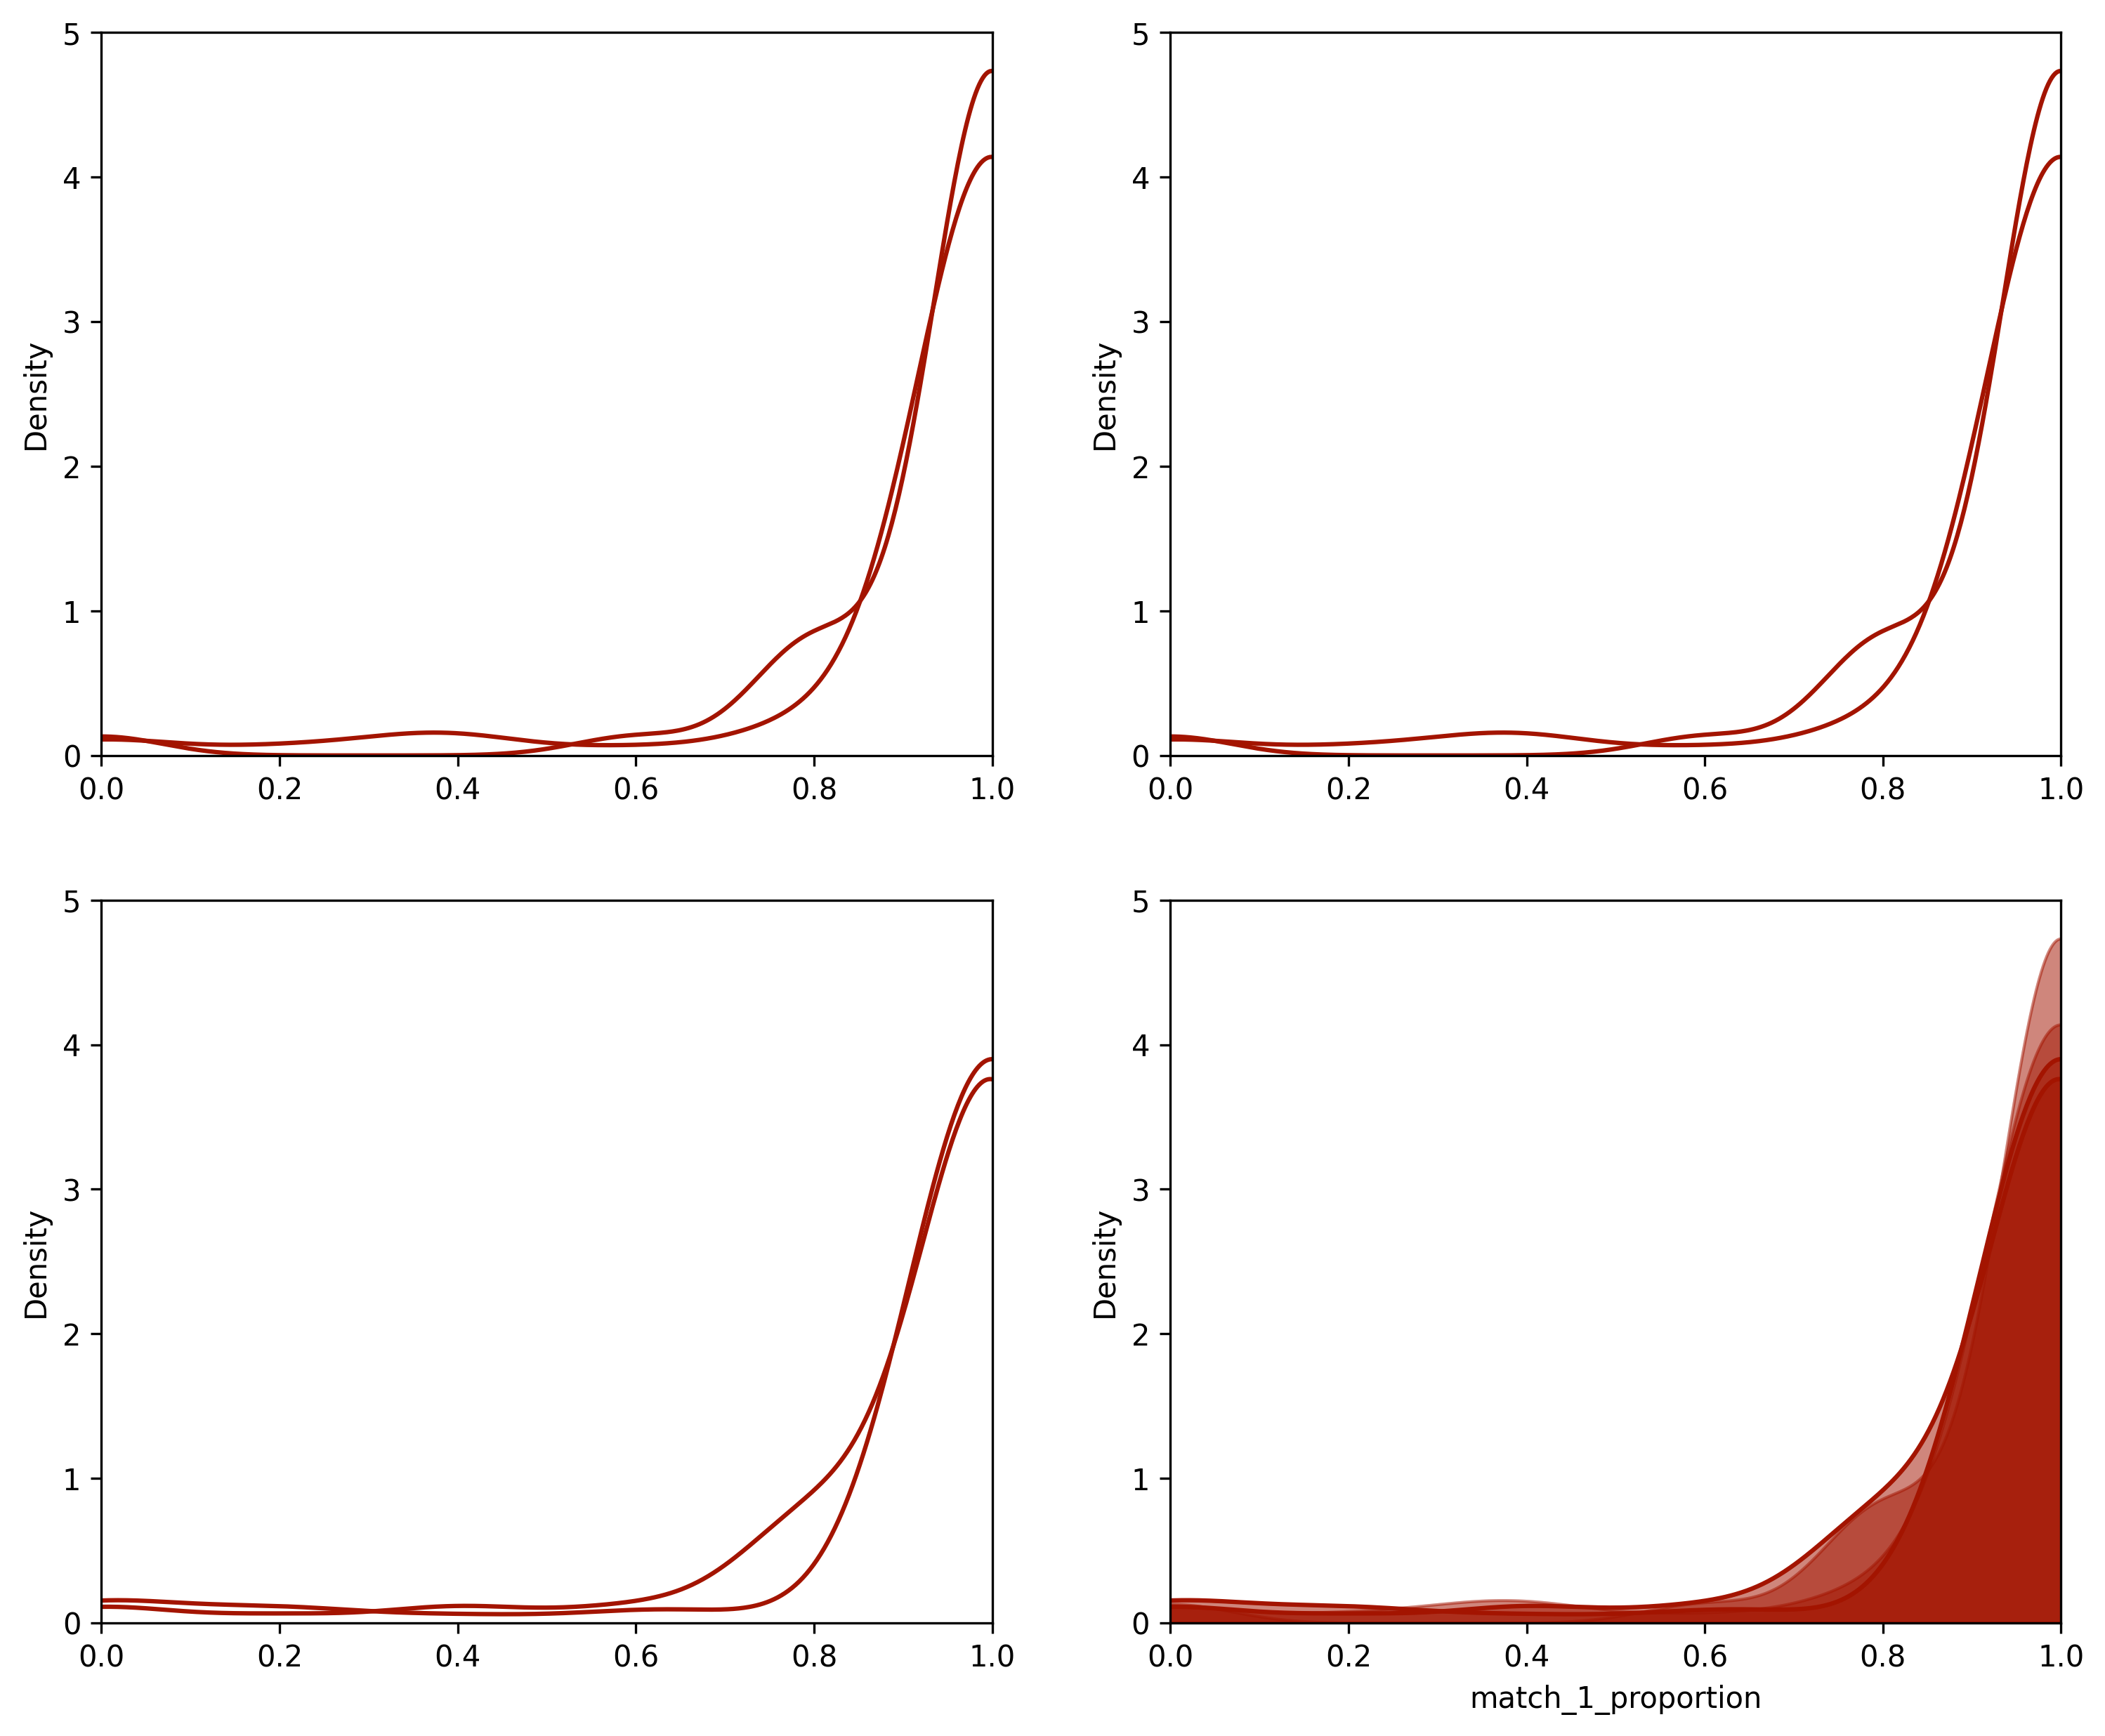

In [ ]:
def get_1_proportion(df,col,group):
    filtered_df = df[df[col].notnull()]

    grouped_df = filtered_df.groupby(group).agg(
        match_1_count=('match_flag', lambda x: (x == 1).sum()),
        total_count=('match_flag', 'count'),
        subcategories=('subcategories', 'first')
    )

    grouped_df['match_1_proportion'] = grouped_df['match_1_count'] / grouped_df['total_count']
    return grouped_df
colors = ['#a31400','#144629','#f1f0e9']
plt.rcParams['figure.dpi'] = 300
columns = ['problem_types', 'business_names']
def paint_density(df,columns,colors,ax):

    for i, col in enumerate(columns):
        ax = get_1_proportion(df, col,'doc_ids')['match_1_proportion'].plot(kind='density', color=colors[0])
        x = ax.lines[-1].get_xdata()
        y = ax.lines[-1].get_ydata()
        plt.fill_between(x, y, color=colors[0], alpha=0.3)


    plt.xlabel('match_1_proportion')
    plt.ylabel('Density')
    plt.xlim(0, 1)
    plt.ylim(0, 5)
    

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array
df_list=[df1,df1,df2,df2]
for j in range(4):
    ax = axes[j]

    for i, col in enumerate(columns):
        get_1_proportion(df_list[j], col,'doc_ids')['match_1_proportion'].plot(kind='density', color=colors[0],ax=ax)
        x = ax.lines[-1].get_xdata()
        y = ax.lines[-1].get_ydata()
        plt.fill_between(x, y, color=colors[0], alpha=0.3)


        plt.xlabel('match_1_proportion')
        plt.ylabel('Density')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 5)
plt.show()

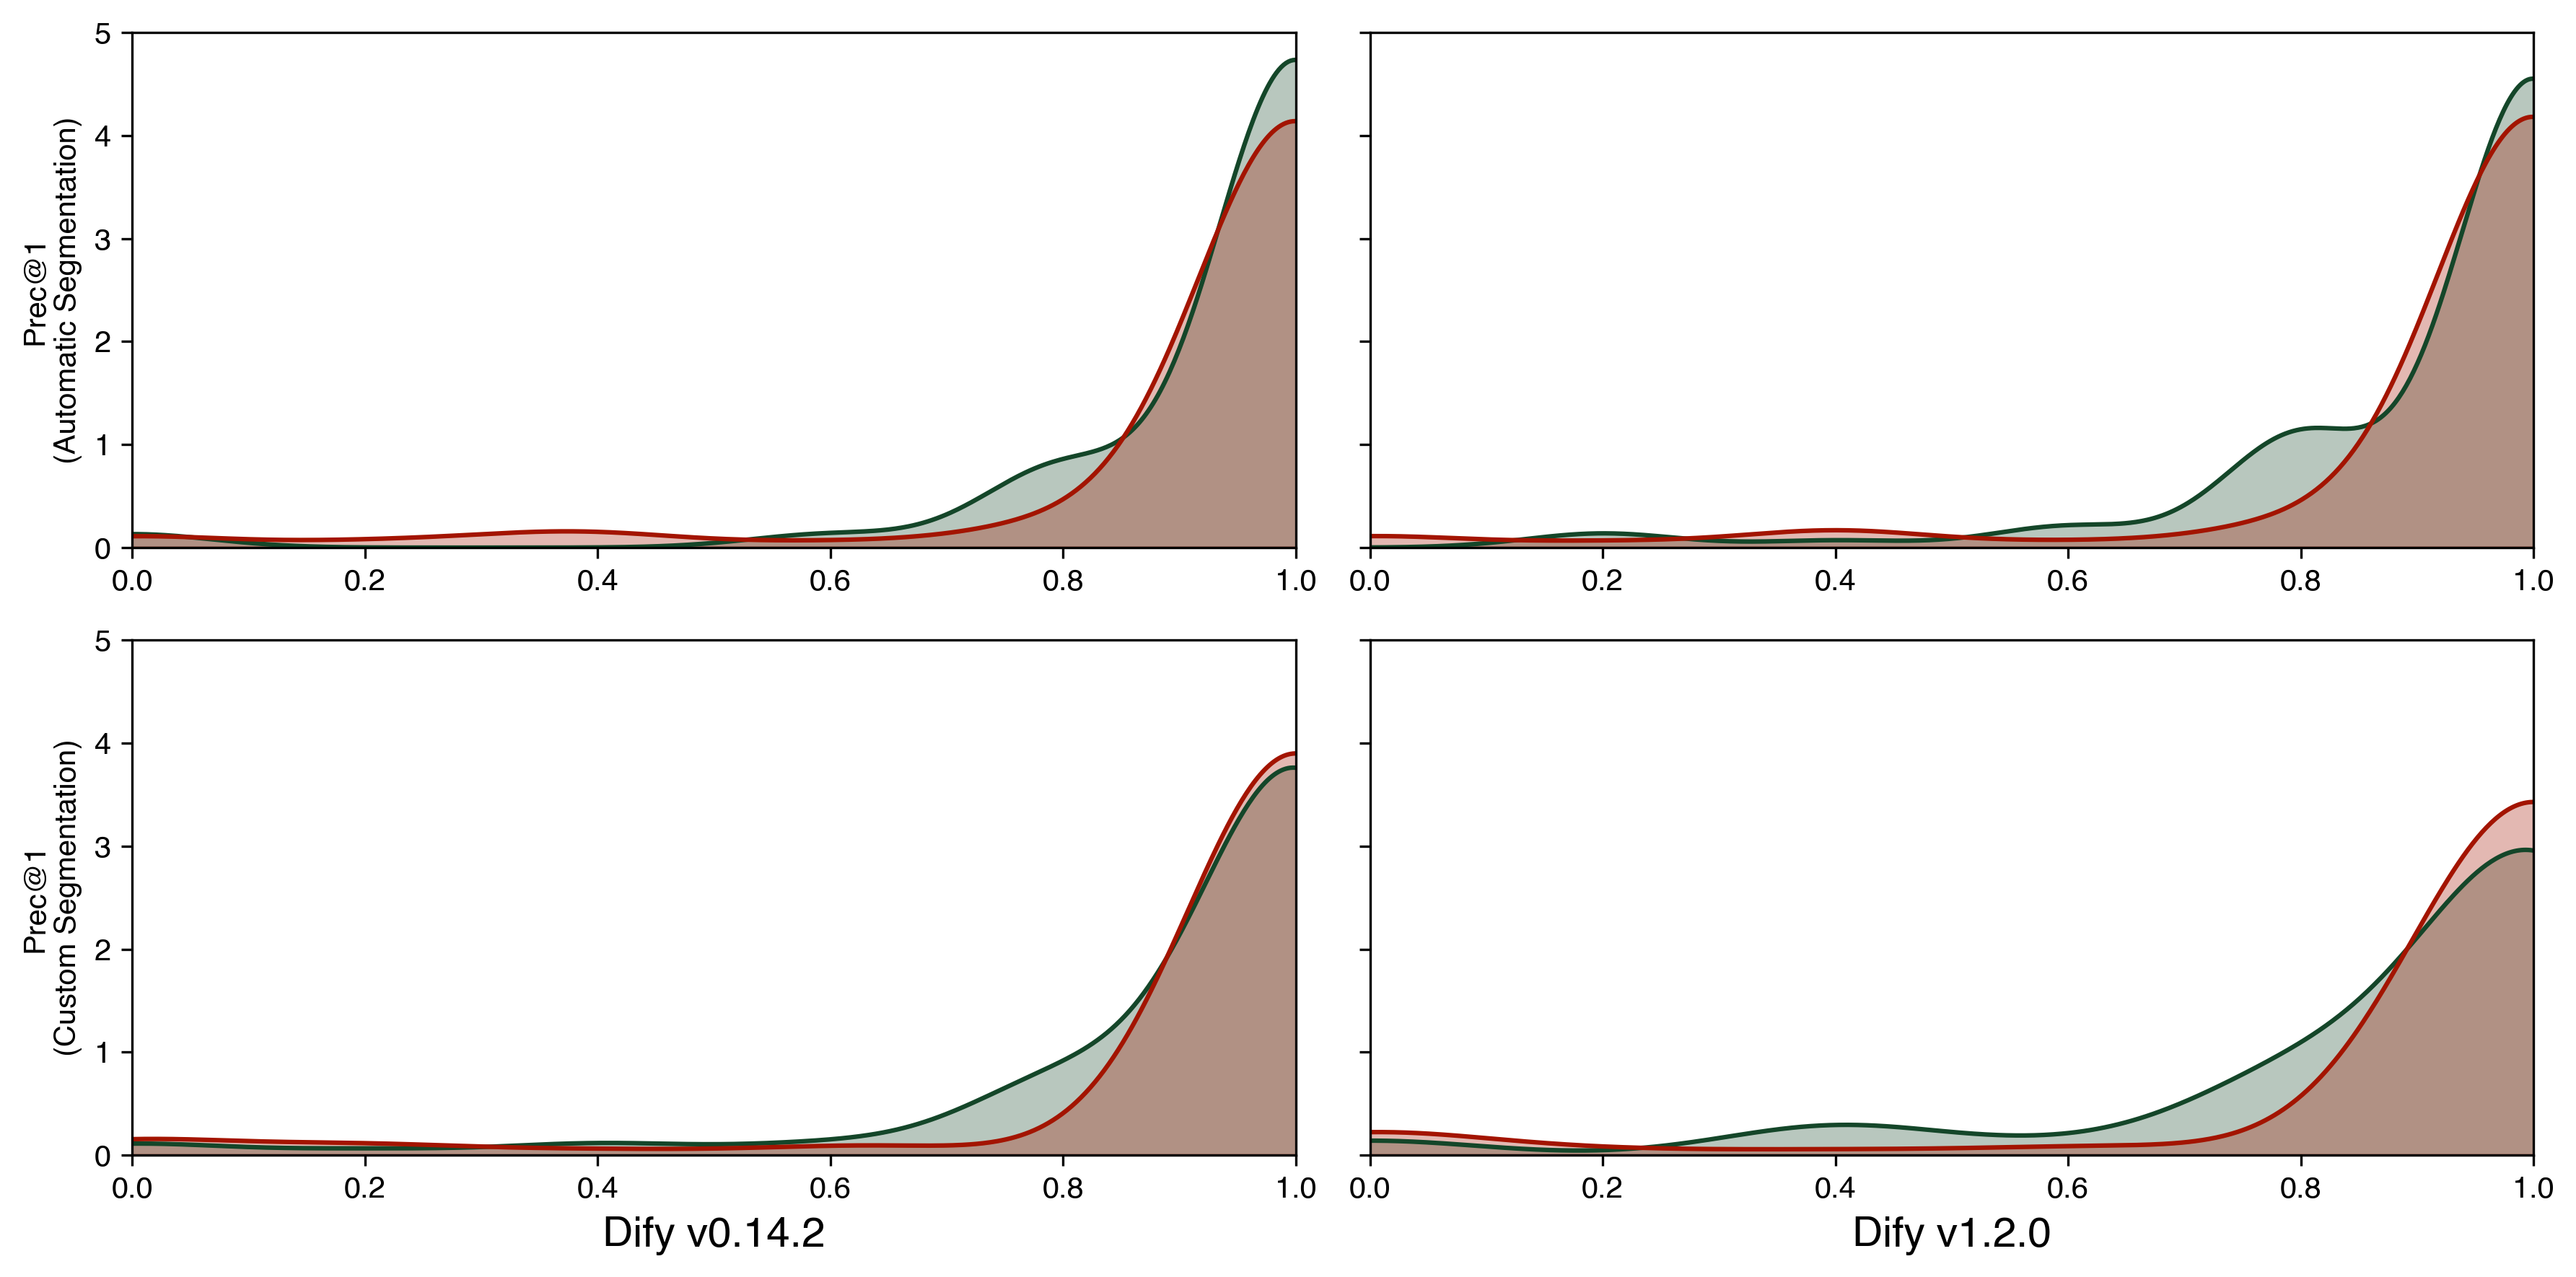

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6),sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array
df_list=[df1,df3,df2,df4]
mpl.rcParams['font.family'] = 'Helvetica'
columns=['business_names','problem_types']
colors=['#144629' ,'#a31400']
for j in range(4):
    ax = axes[j]
    for i, col in enumerate(columns):
        get_1_proportion(df_list[j], col,'doc_ids')['match_1_proportion'].plot(kind='density', color=colors[i],ax=ax)
        x = ax.lines[-1].get_xdata()
        y = ax.lines[-1].get_ydata()
        ax.fill_between(x, y, color=colors[i], alpha=0.3)


        ax.set_xlim(0, 1)
        ax.set_ylim(0, 5)
    if j==3:
        ax.set_xlabel('Dify v1.2.0',fontsize=14)
    elif j==2:
        ax.set_xlabel('Dify v0.14.2',fontsize=14)
        ax.set_ylabel('Prec@1\n(Custom Segmentation)')
    elif j==0:
        ax.set_ylabel('Prec@1\n(Automatic Segmentation)')
    else:
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()  
plt.savefig('density_plots_0521.svg',dpi=300,facecolor='#f5f4ef')

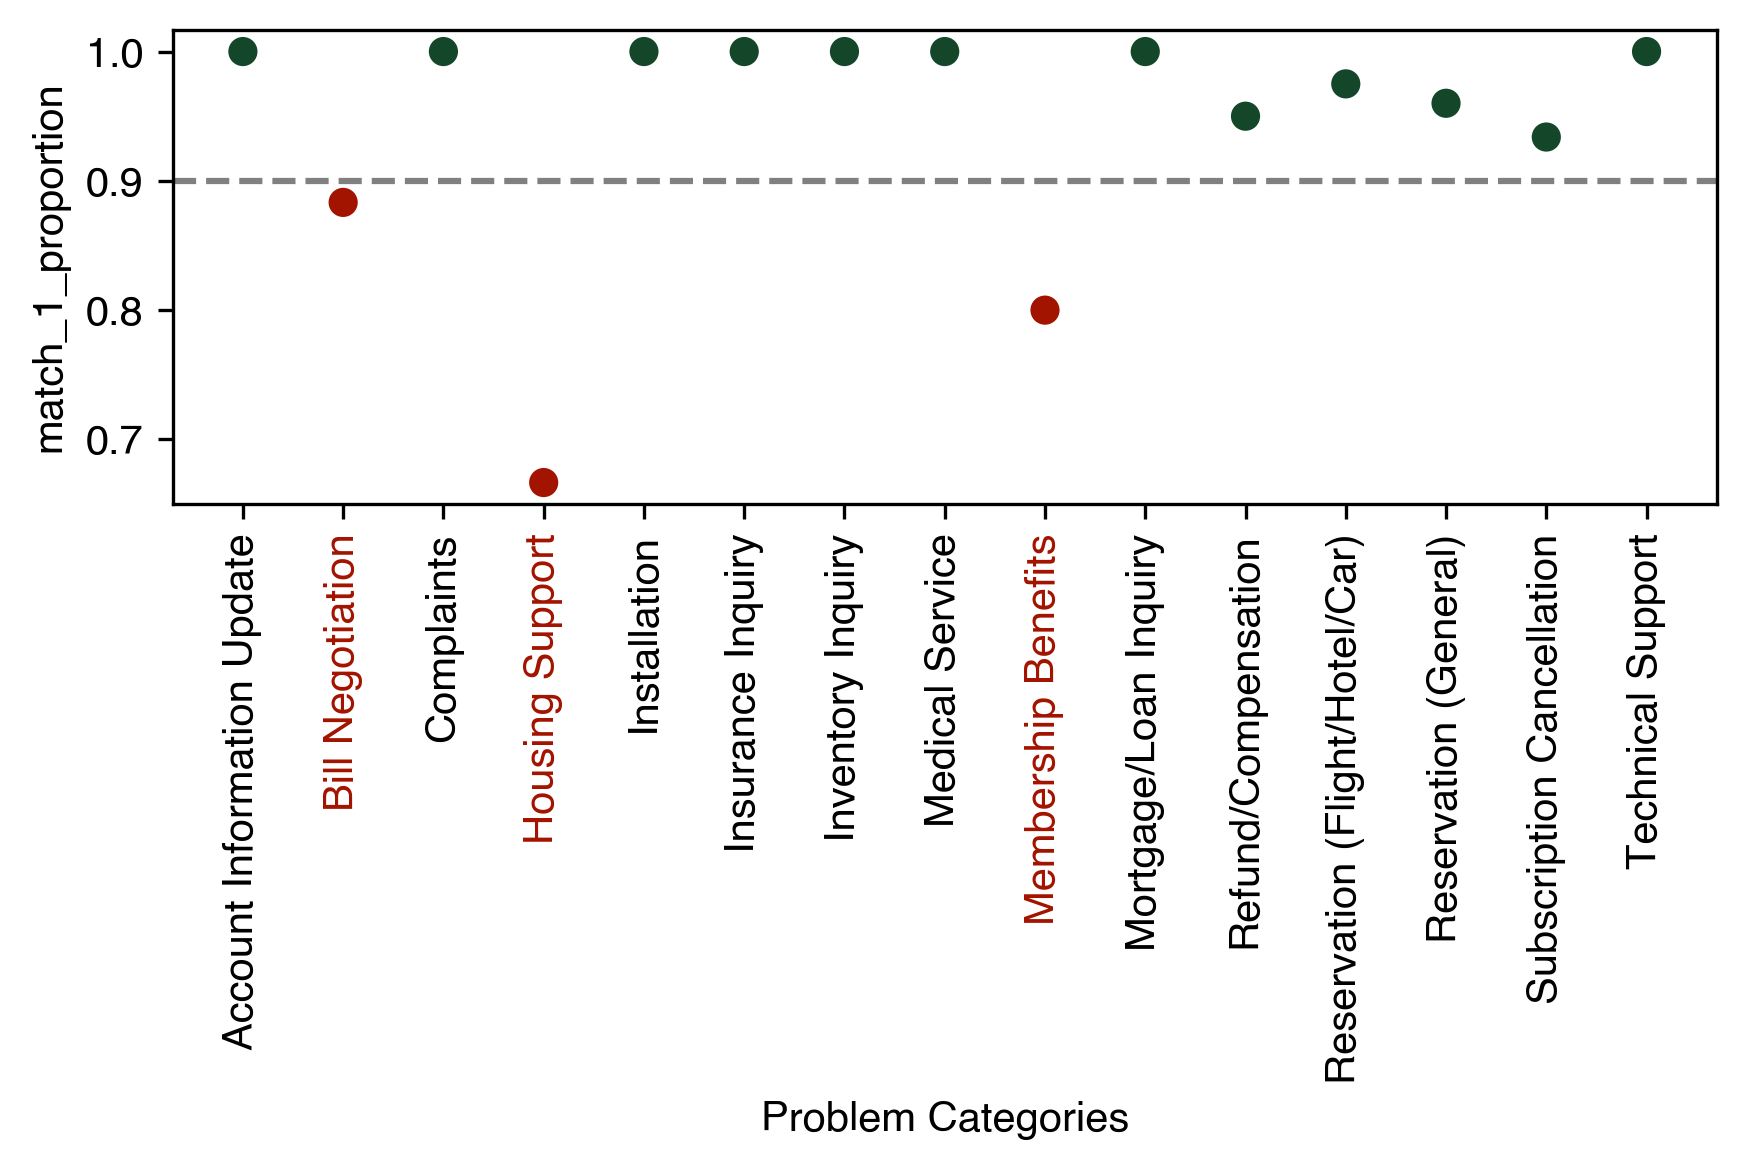

In [246]:
data=get_1_proportion(df1,'business_names','subcategories')
x = range(len(data))

colors = ['#a31400' if val < 0.9 else '#144629' for val in data['match_1_proportion']]
plt.scatter(x, data['match_1_proportion'], c=colors)


plt.xlabel('Problem Categories')
plt.ylabel('match_1_proportion')
business_names = data['subcategories'].tolist()

plt.xticks(x, business_names, rotation=90, fontsize=10)
plt.axhline(y=0.9, color='gray', linestyle='--', label='y = 0.65')
xtick_labels = plt.gca().get_xticklabels()

for i, label in enumerate(xtick_labels):
    if data['match_1_proportion'].iloc[i] < 0.9:
        label.set_color('#a31400')

plt.tight_layout()
plt.savefig('business_name_match_1_proportion.svg',dpi=300,facecolor='#f5f4ef')

In [21]:
get_1_proportion(df1,'business_names','subcategories')

,match_1_count,total_count,subcategories,match_1_proportion
subcategories,,,,
Subscription Cancellation,113,121,Subscription Cancellation,0.933884
Reservation (General),72,75,Reservation (General),0.960000
Bill Negotiation,53,60,Bill Negotiation,0.883333
Reservation (Flight/Hotel/Car),39,40,Reservation (Flight/Hotel/Car),0.975000
Inventory Inquiry,30,30,Inventory Inquiry,1.000000
Refund/Compensation,19,20,Refund/Compensation,0.950000
Mortgage/Loan Inquiry,15,15,Mortgage/Loan Inquiry,1.000000
Housing Support,10,15,Housing Support,0.666667
Medical Service,15,15,Medical Service,1.000000


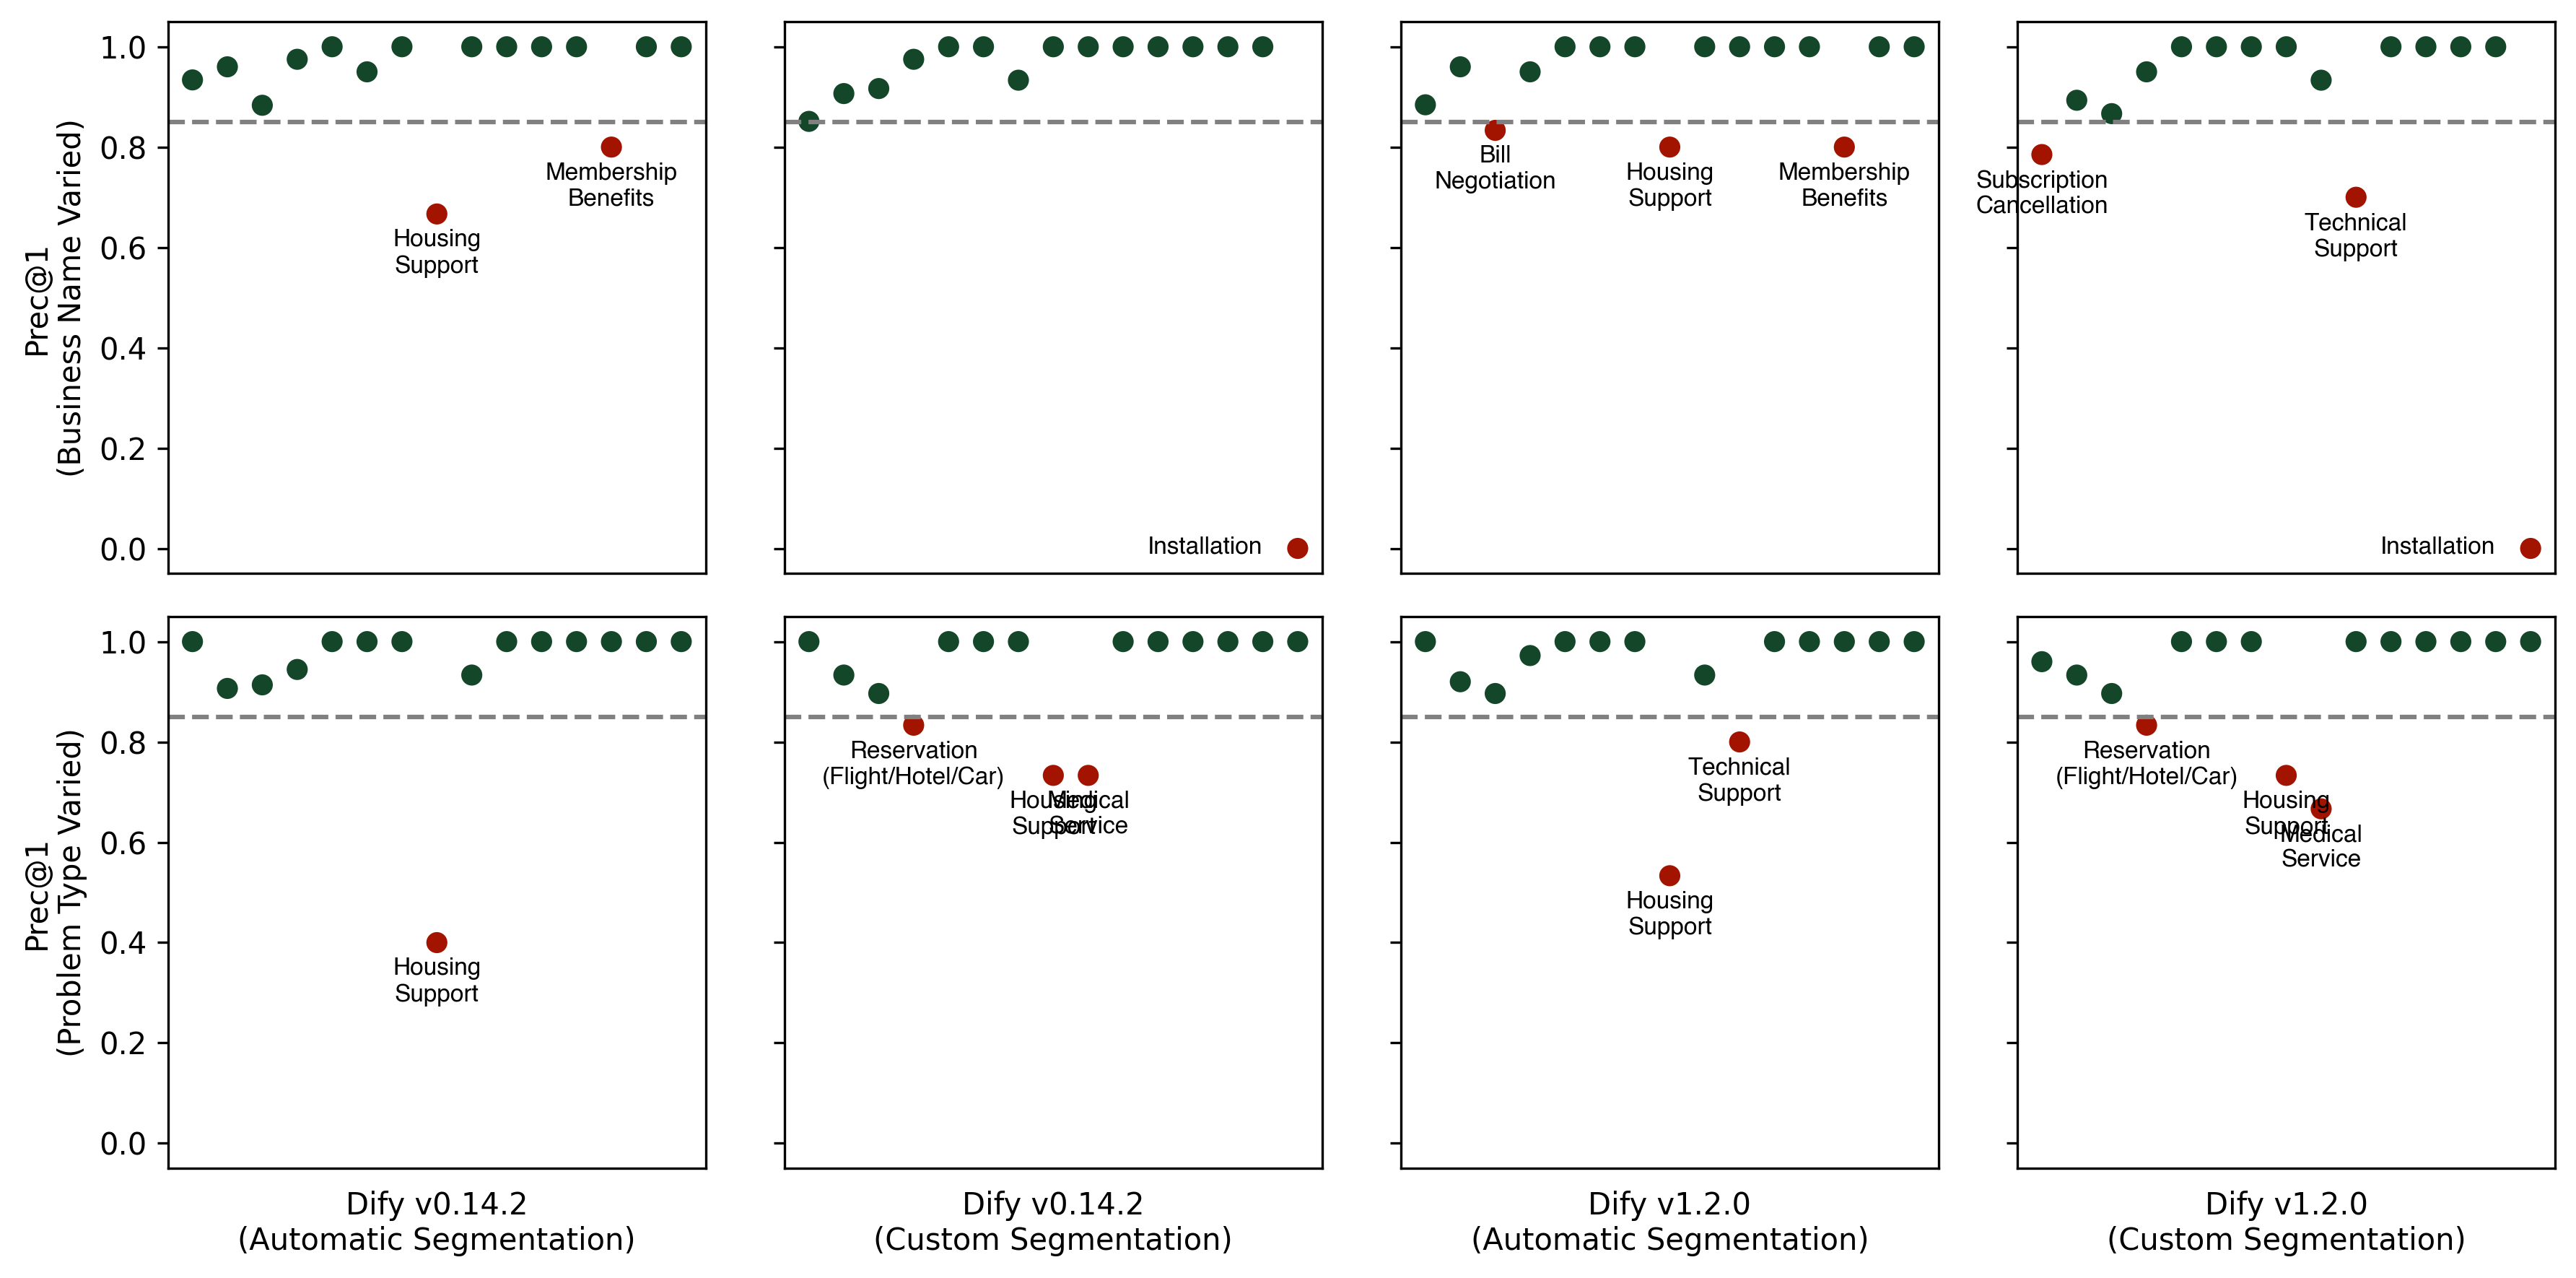

In [95]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6),sharey=True)
axes = axes.flatten()  # Flatten the 2D axes array into a 1D array
df_list=[df1,df2,df3,df4,df1,df2,df3,df4]
col_list=['business_names','business_names','business_names','business_names','problem_types','problem_types','problem_types','problem_types']
mpl.rcParams['font.family'] = 'Helvetica'
for i in range(8):
    data = get_1_proportion(df_list[i], col_list[i], 'subcategories')
    
    x = range(len(data))

    colors = ['#a31400' if val < 0.85 else '#144629' for val in data['match_1_proportion']]
    axes[i].scatter(data['subcategories'], data['match_1_proportion'], c=colors)



    business_names = data['subcategories'].tolist()

    axes[i].set_xticks([])

    axes[i].axhline(y=0.85, color='gray', linestyle='--', label='y = 0.65')
    for j, color in enumerate(colors):
        if color == '#a31400':
            y_value = data['match_1_proportion'].iloc[j]
            if y_value < 0.2:
                axes[i].text(x[j]-4.3, y_value-0.01, 
                             business_names[j].replace(' ','\n'),  fontsize=8, rotation=0)
            else:
                axes[i].text(x[j], y_value - 0.03, 
                             business_names[j].replace(' ','\n'), ha='center', va='top', fontsize=8, rotation=0)

    if i==4:
        axes[i].set_xlabel('Dify v0.14.2\n(Automatic Segmentation)')
        axes[i].set_ylabel('Prec@1\n(Problem Type Varied)')
    elif i==5:
        axes[i].set_xlabel('Dify v0.14.2\n(Custom Segmentation)')
    elif i==6:
        axes[i].set_xlabel('Dify v1.2.0\n(Automatic Segmentation)')
    elif i==7:
        axes[i].set_xlabel('Dify v1.2.0\n(Custom Segmentation)')
    elif i==0:
         axes[i].set_ylabel('Prec@1\n(Business Name Varied)')
    else:
        continue




plt.tight_layout()
plt.savefig('categories_match_1_proportion_0521.svg',dpi=300,facecolor='#f5f4ef')

In [173]:
sp=pd.read_excel('sample_0515.xlsx')
sp

,doc_ids,doc_names,ID,business_name,problem_type,subcategories,business_names,problem_types,query
0,9e56faf7-f690-4dee-a5ca-dcb087834ebf,Contact Information and Authentication for Nor...,105,Nordstrom,Gift sender identification,Account Information Update,Nordstrom,Identifying givers of presents,Contact Information and Authentication for Nor...
1,a4d55b49-bed1-4e50-a0eb-9dbad9b202f8,General solution for Ultra Mobile - Internatio...,201,Ultra mobile,International phone plan inquiry,Account Information Update,Ultra Mobile,Overseas phone package question,General solution for Ultra Mobile - Overseas p...
2,23955cb8-ab05-4eec-a238-f038029aafe7,General solution for Rogers - wireless bill lo...,85,Rogers,Wireless bill lowering negotiation,Bill Negotiation,Rogers,Negotiating lower amounts for wireless bills,General solution for Rogers - Negotiating lowe...
3,ea9b2d96-bc2e-4e3a-a5d0-178af6d7496b,Contact Information and Authentication for GEI...,206,Geico,Negotiating lower car insurance premium,Bill Negotiation,Geico,Exploring options for car insurance discount,Contact Information and Authentication for Gei...
4,2cb1607c-6d70-4918-9d49-6299104b4993,General solution for Shopify - Fraudulent Shop...,9,Shopify,Fraudulent shopify charges,Bill Negotiation,Shopify,Unauthorized Shopify transactions,General solution for Shopify - Unauthorized Sh...
...,...,...,...,...,...,...,...,...,...
83,35bf7079-2a53-4354-88ee-e645569256ce,Contact Information and Authentication for Rog...,329,Rogers,Subscription cancellation,Subscription Cancellation,Rogers,Termination of membership,Contact Information and Authentication for Rog...
84,183f8f9b-fb03-43bb-9b8c-abadb9497075,Contact Information and Authentication for Bil...,367,Billie,Subscription cancellation,Subscription Cancellation,Billie,Discontinuation of subscription,Contact Information and Authentication for Bil...
85,7abc5c4f-b3d4-40f6-ac5c-d86d6cd92b90,Contact Information and Authentication for Bac...,341,Backstage,Subscription cancellation,Subscription Cancellation,Backstage,Ending a Membership,Contact Information and Authentication for Bac...
86,6fa4b4ce-5841-47d7-8644-8a1ed5ac45e8,Contact Information and Authentication for Exc...,223,Excel pool & spa,Voicemail communication issues,Technical Support,Excel Pool & Spa,Voicemail transmission trouble,Contact Information and Authentication for Exc...


In [174]:
sp=pd.merge(sp,df,on='doc_ids',how='left')
sp['match_flag'].value_counts()

1    80
0     5
2     3
Name: match_flag, dtype: int64

In [179]:
df=pd.read_csv('document_list_0.14.2_automatic.csv')
df

,doc_ids,doc_names,ID,business_name,problem_type,subcategories,doc_contents,doc_name_1,doc_id_1,doc_content_1,score_1,doc_name_2,doc_id_2,doc_content_2,score_2,match_flag
0,ef13ddaf-4e8e-42f5-980a-4d838302f559,General solution for Zanti Cucina Italiana - R...,1,Zanti cucina italiana - river oaks,Reservation failure,Reservation (General),Empty,Contact Information and Authentication for Zan...,ad07bfa3-cd48-4c7c-bb9e-897980a1172c,Contact Information and Authentication for Zan...,0.630924,General solution for Zanti Cucina Italiana - R...,a908fae4-b2a4-4991-a1b3-70ccb818ea3d,General solution for Zanti Cucina Italiana - R...,0.627655,2
1,683987e5-7c99-4311-aea5-a8c5d7df96e5,Contact Information and Authentication for Zan...,2,Zanti cucina italiana - river oaks,Reservation failure,Reservation (General),Empty,Contact Information and Authentication for Zan...,ad07bfa3-cd48-4c7c-bb9e-897980a1172c,Contact Information and Authentication for Zan...,0.877129,General solution for Zanti Cucina Italiana - R...,a908fae4-b2a4-4991-a1b3-70ccb818ea3d,General solution for Zanti Cucina Italiana - R...,0.524378,1
2,f38f62fb-175e-478d-b1d7-c6847b6e4e8c,General solution for Canon Canada Inc. - Print...,3,Canon canada inc.,Printer replacement claim,Technical Support,General solution for Canon Canada Inc. - Print...,General solution for Canon Canada Inc. - Print...,20d9d402-d5a4-4102-8b13-409dd56433d3,General solution for Canon Canada Inc. - Print...,0.614371,Contact Information and Authentication for Can...,80bf7001-a407-4277-95e2-1af6d9ad6e2b,Contact Information and Authentication for Can...,0.521982,1
3,08883e89-b6c7-4b62-a289-d33809cf357a,Contact Information and Authentication for Can...,4,Canon canada inc.,Printer replacement difficulty,Technical Support,Contact Information and Authentication for Can...,Contact Information and Authentication for Can...,80bf7001-a407-4277-95e2-1af6d9ad6e2b,Contact Information and Authentication for Can...,0.766952,General solution for Canon Canada Inc. - Print...,20d9d402-d5a4-4102-8b13-409dd56433d3,General solution for Canon Canada Inc. - Print...,0.491380,1
4,edba079d-c5f1-4c9e-9236-6894896dfc87,General solution for Geico - PDF Upload Error,5,Geico,Pdf upload error,Technical Support,General solution for Geico - PDF Upload Error\...,General solution for Geico - PDF Upload Error,6d7bb985-39c0-4312-bc59-d0fa98799736,General solution for Geico - PDF Upload Error\...,0.602402,Contact Information and Authentication for Gei...,479a9c85-b9d4-402e-a5d3-e33fd0ee267b,Contact Information and Authentication for Gei...,0.473855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,4f310a3c-9a47-4eed-bb02-6016b8ddb3d1,Contact Information and Authentication for Pla...,431,Playstation plus,Subscription cancellation,Subscription Cancellation,Contact Information and Authentication for Pla...,Contact Information and Authentication for Pla...,62e290c8-3735-4acc-acfc-ddce0eb12e37,Contact Information and Authentication for Pla...,0.836513,Contact Information and Authentication for AMC...,c84f98b7-bc5d-4710-9970-e378e5f3448a,Contact Information and Authentication for AMC...,0.522547,1
427,a6c1ca7a-629c-4313-9c70-3fa24d44f881,Contact Information and Authentication for McA...,432,Mcafee,Subscription cancellation,Subscription Cancellation,Contact Information and Authentication for McA...,Contact Information and Authentication for McA...,cf068eb9-ac66-4d42-acf3-1224ae94cd29,Contact Information and Authentication for McA...,0.673573,Contact Information and Authentication for Mac...,a37373e2-8297-421d-9195-0c9401982176,Contact Information and Authentication for Mac...,0.555635,1
428,adf104dc-3e22-482a-9380-6d1cf4c2c573,Contact Information and Authentication for Ida...,433,Idaho power,Lowering power bill,Bill Negotiation,Contact Information and Authentication for Ida...,Contact Information and Authentication for Ida...,a4365ffb-0b45-4c7f-966b-8fd54068e83a,Contact Information and Authentication for Ida...,0.772497,General solu

In [180]:

df1 = df.groupby('match_flag').sample(n=20, random_state=42)


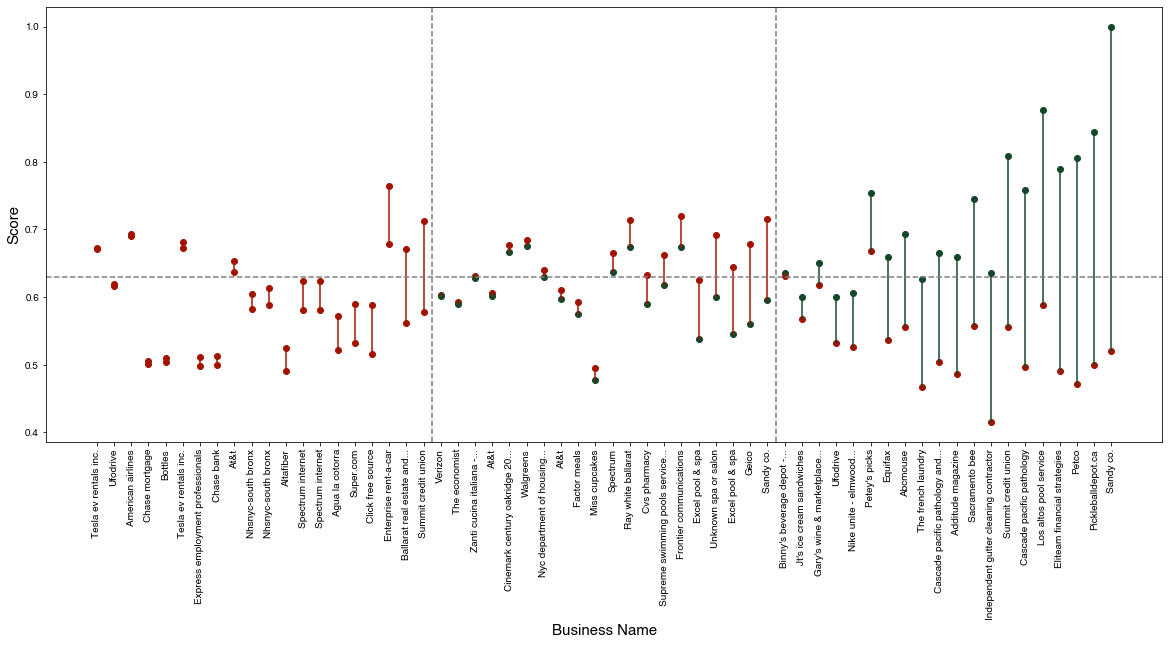

In [182]:
plt.figure(figsize=(20, 8))
mpl.rcParams['font.family'] = 'Helvetica'
df1['score_gap']=df1['score_1']-df1['score_2']
df1['match_flag'] = pd.Categorical(df1['match_flag'], categories=[0, 2, 1], ordered=True)
df1=df1.sort_values(by=['match_flag', 'score_gap'], ascending=[True, True])

x = range(len(df1))
y1 = df1['score_1']
y2 = df1['score_2']
index0=[]
index2=[]
index1=[]
for i in range(len(df1)):
    if df1['match_flag'].iloc[i] == 1:
        index1.append(i)
        
    elif df1['match_flag'].iloc[i] == 2:
        index2.append(i)
    else:
        index0.append(i)

for i in range(len(df1)):
    if i in index1:
        plt.plot([x[i], x[i]], [y1.iloc[i], y2.iloc[i]], color='#144629' )
    else:
        plt.plot([x[i], x[i]], [y1.iloc[i], y2.iloc[i]], color='#a31400')
plt.axhline(y=0.63, color='gray', linestyle='--', label='y = 0.65')
plt.axvline(x=19.5, color='gray', linestyle='--', label='y = 0.65')
plt.axvline(x=39.5, color='gray', linestyle='--', label='y = 0.65')

plt.scatter(x[:20], y1[:20], color='#a31400')
plt.scatter(x[:20], y2[:20], color='#a31400')
plt.scatter(x[20:40], y1[20:40], color='#a31400')
plt.scatter(x[20:40], y2[20:40], color='#144629')
plt.scatter(x[40:], y1[40:], color='#144629')
plt.scatter(x[40:], y2[40:], color='#a31400')


business_names = df1['business_name'].apply(lambda x:' '.join(x.split(' ')[:4])+'...' if len(x.split(' '))>4 else x ).tolist()

plt.xticks(x, business_names, rotation=90, fontsize=10)

plt.xlabel('Business Name', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.savefig('RT_0520_font.svg', dpi=300, bbox_inches='tight',facecolor='#f5f4ef')


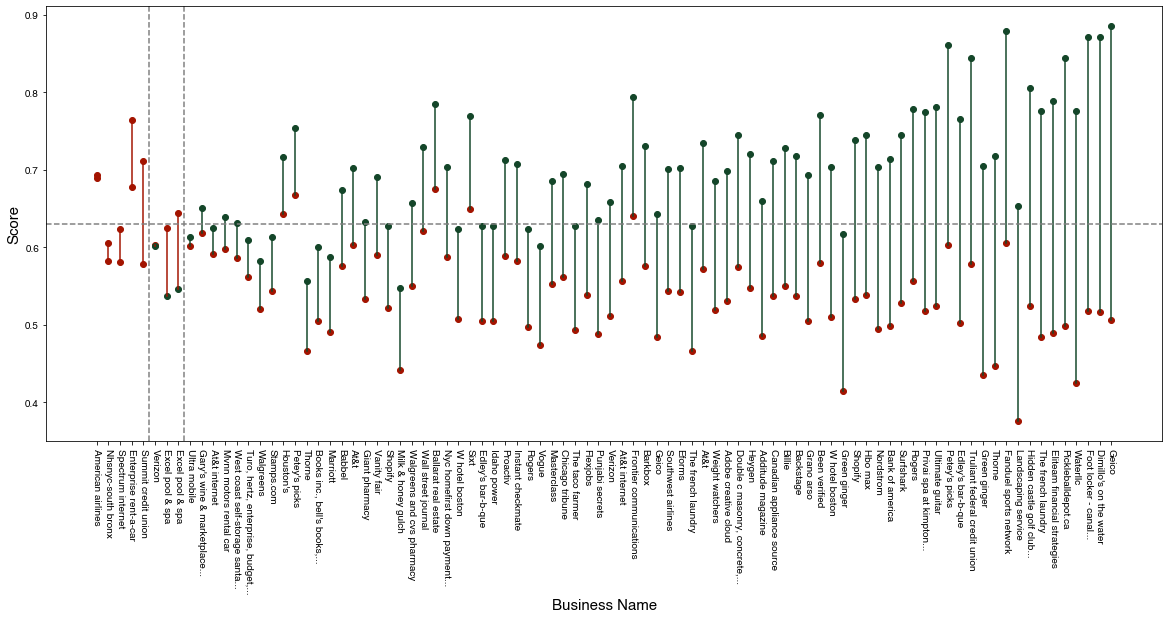

In [177]:
plt.figure(figsize=(20, 8))
df1=sp
df1['score_gap']=df1['score_1']-df1['score_2']
df1['match_flag'] = pd.Categorical(df1['match_flag'], categories=[0, 2, 1], ordered=True)
df1=df1.sort_values(by=['match_flag', 'score_gap'], ascending=[True, True])

x = range(len(df1))
y1 = df1['score_1']
y2 = df1['score_2']
index0=[]
index2=[]
index1=[]
for i in range(len(df1)):
    if df1['match_flag'].iloc[i] == 1:
        index1.append(i)
        
    elif df1['match_flag'].iloc[i] == 2:
        index2.append(i)
    else:
        index0.append(i)

for i in range(len(df1)):
    if i in index1:
        plt.plot([x[i], x[i]], [y1.iloc[i], y2.iloc[i]], color='#144629' )
    else:
        plt.plot([x[i], x[i]], [y1.iloc[i], y2.iloc[i]], color='#a31400')
plt.axhline(y=0.63, color='gray', linestyle='--', label='y = 0.65')
plt.axvline(x=4.5, color='gray', linestyle='--', label='y = 0.65')
plt.axvline(x=7.5, color='gray', linestyle='--', label='y = 0.65')

plt.scatter(x[:5], y1[:5], color='#a31400')
plt.scatter(x[:5], y2[:5], color='#a31400')
plt.scatter(x[5:8], y1[5:8], color='#a31400')
plt.scatter(x[5:8], y2[5:8], color='#144629')
plt.scatter(x[8:], y1[8:], color='#144629')
plt.scatter(x[8:], y2[8:], color='#a31400')


business_names = df1['business_name_x'].apply(lambda x:' '.join(x.split(' ')[:4])+'...' if len(x.split(' '))>4 else x ).tolist()

plt.xticks(x, business_names, rotation=-90, fontsize=10)

labels = plt.gca().get_xticklabels()

plt.xlabel('Business Name', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.savefig('RT_0520_88_font.svg', dpi=300, bbox_inches='tight',facecolor='#f5f4ef')
